# Skipping the Staging Area

- To make changes, we usually, stage them, and then commit them.
- The separate step between staging and committing allows us to stage several changes in one commit. But if we already know that the current changes are the ones that we want to commit, we can skip the staging step and go directly to the commit.
    - We do this by using the dash a-flag to the git commit command. This flag automatically stages every file that's tracked and modified before doing the commit letting it skip the git add step. 
    - At first, you might think that ```git commit -a``` is just a shortcut for git add followed by ```git commit``` but that's not exactly true. ```Git commit -a``` doesn't work on new files because those are untracked. Instead, ```git commit -a``` is a shortcut to stage any changes to tracked files and commit them in one step. If the modified file has never been committed to the repo, we'll still need to use ```git add``` to track it first. 
    
Let's modify our example from previous week 'all_checks.py'
First we will change directory to the desired directory by using the command
```
cd C:/users/Imran/GitTutorials/scripts
```


Second, we will open the file all_checks.py for modification using 
```
start all_checks.py
```

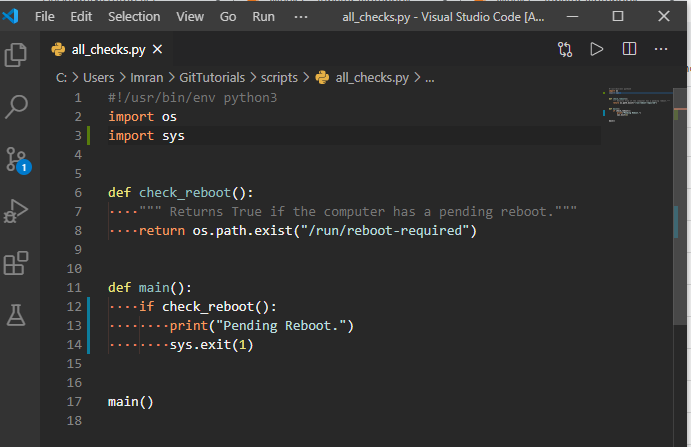

Now that we've made the change, we're ready to try out the new -a flag. We'll also use the -m flag to add the commit message directly. This time, we'll say that we're calling check underscore reboot and exiting with one on the error condition.

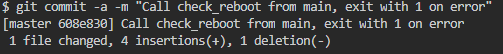

Keep in mind that when you use the -m shortcut, you can only write short messages and can't use the best practices regarding commit descriptions that we talked about earlier. 

So it's best reserved for truly small changes that don't require extra context or explanation.

When you use the -a shortcut, you skip the staging area. Meaning, you can't add any other changes before creating the commit. So you need to be sure that you've already included everything you want to include in that commit.

In the end, using a shortcut like -a is just like using the regular commit workflow. The commit will show up in the log along with the message just as usual. Let's check that out. 

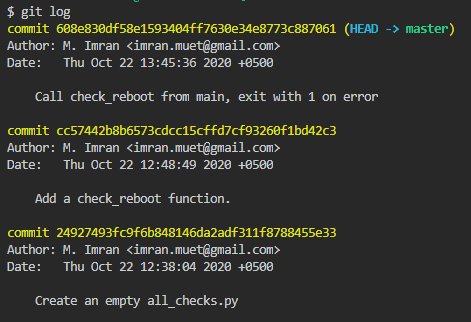

See how our latest commit was added to the top of the list of commits and notice how the head indicator has now moved to the latest commit. 

**A brief introduction of HEAD**

Git uses the head alias to represent the currently checked out snapshot of your project. This lets you know what the contents of your working directory should be. In this case, the current snapshot is the latest commit in the project. We'll soon learn about branches. In that case, head can be a commit in a different branch of the project. We can even use git to go back in time and have head representing old commit from before the latest changes were applied. In all cases, head is used to indicate what the currently checked out snapshot is. This is how git marks your place in the project. Think about it as a bookmark that you can use to keep track of where you are. Even if you have multiple books to read, the bookmark allows you to pick up right where you left off. When you run git commands like diff, branch, or status, git will use the head bookmark as a basis for whatever operation it's performing. We'll see Head used when we learn how to undo things and perform rollbacks. As a shortcut, it's generally easy to think of head as a pointer to the current branch, although it can be more powerful than that. 

# Getting More Information About Our Changes
We've seen how ```git log``` shows us the list of commits made in the current Git repository. By default, it prints the commit message, the author, and the date of the change. This is useful, but if we're combing through a history of changes in a repo to try and find what caused the latest outage, we'll probably also need to look at the actual lines that changed in each commit. To do this with ```git log```, we can use the ```-p``` flag. The p comes from patch, because using this flag gives us the patch that was created. Let's try it out.

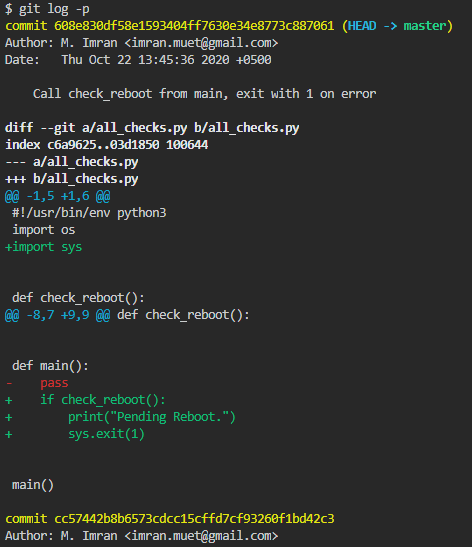

It shows added lines with plusses and remove lines with dashes. Because the amount of text is now longer than what fits on your screen, Git automatically uses a paging tool that allows us to scroll using page up, page down, and the arrow keys. To exit, press q.




If we don't want to scroll down until we find the commit that we're actually interested in, another option is to use the git show command. This command takes a commit ID as a parameter, and will display the information about the commit and the associated patch. 

Let's check this out by first listing the current commits in the repo using ```git log``` and then calling ```git show``` for the second commit in the list.
```
git log
git show commit ID
```
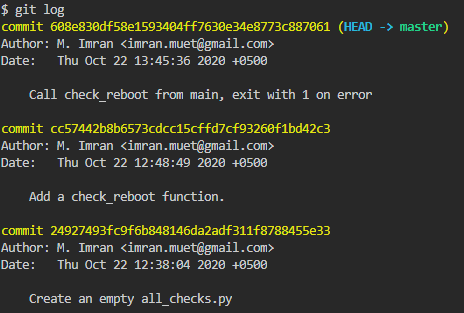


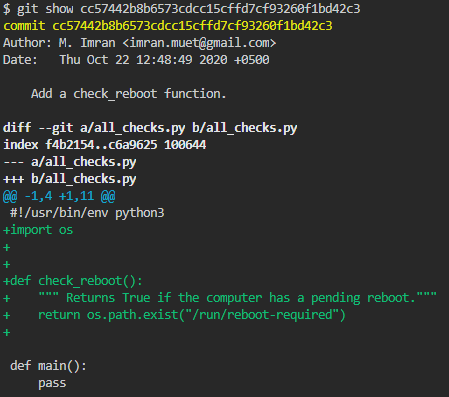

We've shown how we can use ```git log``` for listing commits, and ```git log -p``` for showing the associated patches. Another interesting flag for ```git log``` is the ```--stat``` flag. This will cause ```git log``` to show some stats about the changes in the commit, like which files were changed and how many lines were added or removed. Let's try it with our repo.

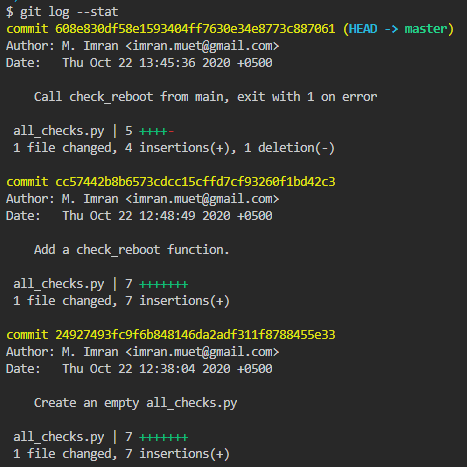

There are a bunch of other options to git log, you can always use the reference documentation or the manual pages to find out more. 

what about changes that haven't been committed yet? Until now, whenever we've made changes to our files, we've either added them to the staging area with git add and committed them with git commit, or committed them directly using git commit -a. This works fine, but it means we have to know exactly which changes we've made. Sometimes it can take a while until we're ready to commit. Imagine you've been working on adding a new complex feature to a script and it requires thorough testing.

Before committing it, you need to make sure that it works correctly. Check that all the test cases are covered and so on and so on. So while doing this you find bugs in your code that you need to fix. It's only natural that by the time you get to the commit step you don't really remember everything you changed. To help us keep track git gives us the ```git diff command```.


Let's make a new change to our script and then try this command out. We'll add another message to the user to say that everything is okay when the check is successful and then exit with 0 instead of 1.
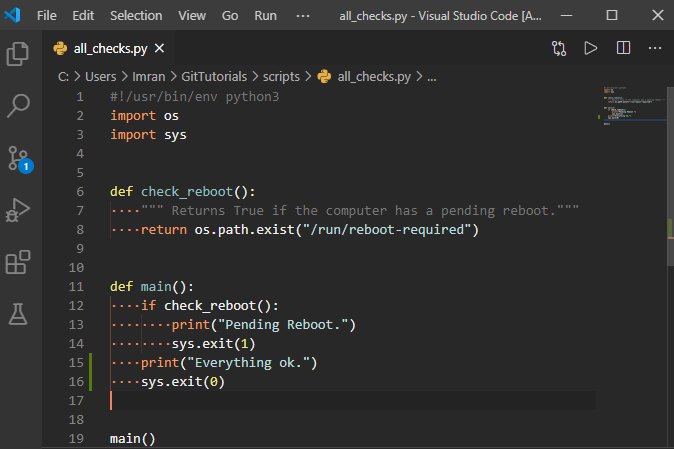
we've made the change. Let's now save it and check out what ```git diff``` shows us.

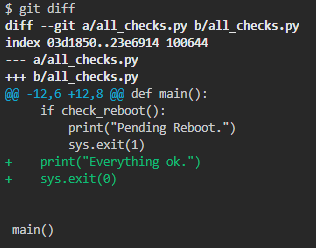


In this case, we see that the only change is the extra lines that we've added. If our change was bigger and included several files, we could pass a file by parameter to see the differences relevant to that specific file instead of all the files at the same time. 


Something else we can do to review changes before adding them is to use the ```-p``` flag with the ```git add``` command.When we use this flag, git will show us the change being added and ask us if we want to stage it or not. This way we can detect if there's any changes that we don't want to commit. Let's try that one out.

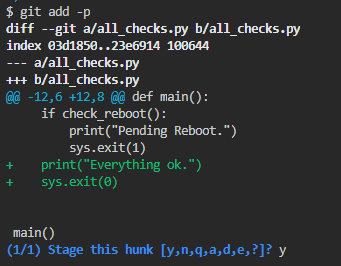
We've staged our change and it's now ready to be committed.
If we call git diff again, it won't show any differences, since git diff shows only unstaged changes by default. Instead, we can call git diff -- staged to see the changes that are staged but not committed. With this command, we can see the actual stage changes before we call git commit.

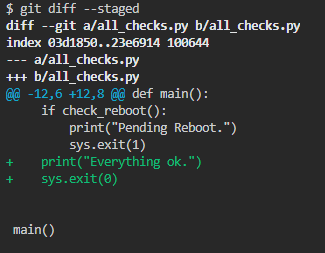

Let's commit these changes now so that they aren't pending anymore.

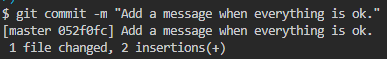

# Deleting and Renaming Files

## Deleting a File


**Step 1:** Let's go to the previous folder using the command
```cd -```

**Step 2:** Ceate a folder (directory) with the name "checks" using the command ```mkdir checks```

**Step 3:** Change the current directory to checks by ```cd ../checks```

**Step 4:** Create two python files using
```
touch disk_usage.py
touch process.py
```
**[Optional]** If you want to add something to the created files, you can open them in vs code by writing the following command
```
start process.py
```

**Step 5:** Now initialize the directory (to bring it to track from untrack) checks
```
git init
```

**Step 6:** Now add the two files to bring them to the staging area by using the following commands
```
git add disk_usage.py process.py
```

**Step 7:** Now commit using 
```
git commit -m "Added two files"
```

Let's say that you've decided to clean up some old scripts and want to remove them from your repository.Or you've done some refactoring, which makes that particular file, obsolete. You can remove files from your repository with the ```git rm``` command, which will stop the file from being tracked by git and remove it from the git directory.

File removals go through the same general workflow that we've seen. So you'll need to write a commit message as to why you've deleted them. 

Let's try this out in our checks repository that contains a file we decided we actually don't want. Well first look the contents of the directory with ```ls```, then delete the file with ```git rm```, then check the contents with ```ls``` again, and finally check the status with ```git status```.

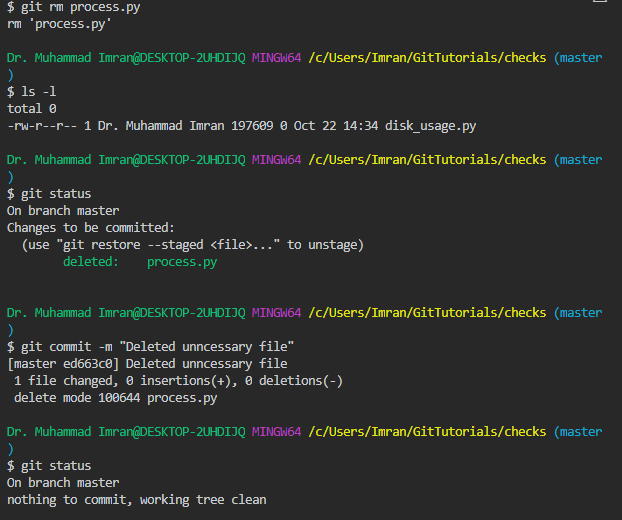



## Renaming a file

You can use the ```git mv``` command to rename files in the repository. Let's rename our existing script to check_free_space.py and check what ```git status``` has to say about that.

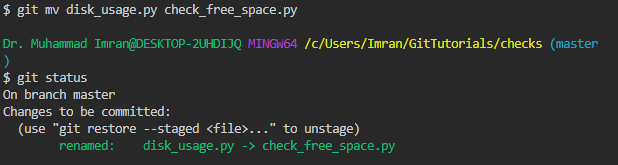

The status shows us that the file was renamed and clearly displays the old and new names. As with the previous example, the change is staged, but not committed. Let's commit it by calling ```git commit``` once again.
``` 
git commit -m "New name for disk_usage.py"
```

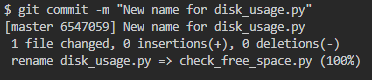

## Moving a file
The ```git mv``` command works in a similar way to the ```mv``` command on Linux and so can be used for both moving and renaming. If our repository included more directories in it, we can use the same ```git mv``` command to move files between directories.

## .gitignore file

The output of git status is a super useful tool to help us know what's up with our files. It shows us which files have tracked or untracked changes, and which files were added, modified, deleted or renamed. It's important that the output of these commands stays relevant to what we're doing. 

If we have a long list of untracked files, we might lose an important change in the noise. If there are files that get automatically generated by our scripts, or our operating system generates artifacts that we don't want in our repo, we'll want to ignore them so that they don't add noise to the output of git status. To do this, we can use the **gitignore** file. Inside this file, we'll specify rules to tell git which files to skip for the current repo.

For example, if we're working on an OSX computer, we'll probably want to ignore the dot DS store file, which is automatically generated by the operating system. To do this, we'll create a .gitignore file containing the name of this file.


```
echo .DS_STORE > .gitignore
ls -la
```

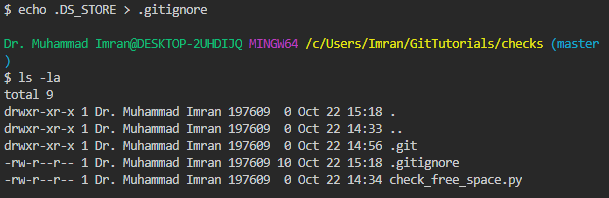

**Remember that the dot prefix in a Unix-like file system indicates that the file or directory is hidden and won't show up when you do the normal directory listing. That's why we have to use ls-la to see all files.**


We've added a gitignore file to our repo but we haven't committed it yet. This file needs to get tracked just like the rest of the files in the repo. Let's add it now.
```
git add .gitignore
git commit -m 'Add a gitignore file, ignoring .DS_STORE files'
```



# Undoing Things
## Undoing Changes Before Committting

Being able to revert our changes is one of the most powerful features offered by version control systems. There's a bunch of different techniques available depending on which changes we need to undo. 
You might find yourself in a situation where you've made a bunch of changes to a file but decide that you don't want to keep them. You can change a file back to its earlier committed state by using the ```git checkout``` command followed by the name of the file you want to revert. 

Speaking of, let's try this out using our scripts repository. We'll edit our all_checks.py script and remove the check reboot function, then save and go back to the command line.
```
cd C:/Users/Imran/GitTutorials
cd ../scripts
start all_checks.py
```

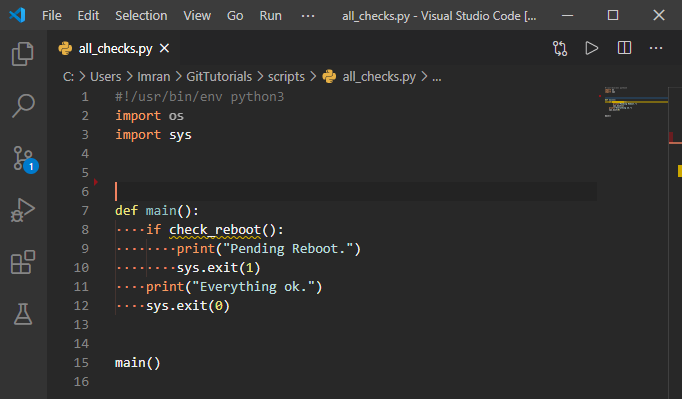

We've made our change. Let's try our script and see what happens.
By deleting that function, we've actually broke the script. 

Let's see what git status has to say about this. 
```
git status
```
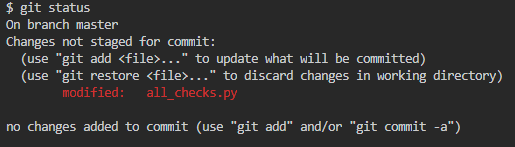

As expected, we see that our file is modified and the changes aren't staged yet. Check out how git gives us a couple helpful tips on what to do now. We can run git add to stage our changes or we can run git checkout to discard them. 

Let's checkout using ```git checkout all_checks.py``` to discard our changes and go back to its previous form. We'll check out at the original file and then take a look at what ```git status``` has to say about it.


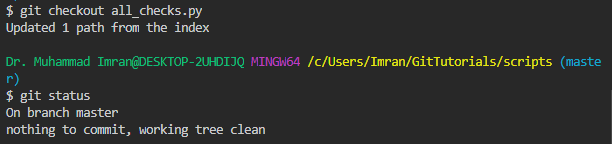

we've demonstrated how we can use ```git checkout``` to revert changes to modify files before they get staged. This command will restore the file to the latest storage snapshot, which can be either committed or staged. So if you've made additional changes to a file after you've staged it, you can restore the file to the earlier stage version. If you need to check out individual changes instead of the whole file, you can do that using the ```dash p``` flag. This will ask you change by change if you want to go back to the previous snapshot or not.


What if you added the changes to the staging area already? Don't stress. If we realize we've added something to the staging area that we didn't actually want to commit, we can unstage our changes by using the ```git reset``` command. Staging changes that we don't actually intend to commit happens all the time. Especially if we use a command like ```git add star```, where the ```star``` is a file glob pattern used in Bash that expands to all files. This command will end up adding any change done in the working tree to the staging area. While sometimes that might be what we want, it can also lead to some surprises.


Let modify all_checks.py file by adding a comment line, and add its output to a file "output.txt". 



Now check the status using ```git status```
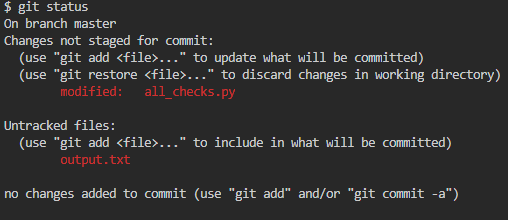

The status tell us that there are two changes: modification in all_checks.py file and the creation of a text file. We can use ```git add *``` command to stage all the changes, and then checking the status using ```git status```.



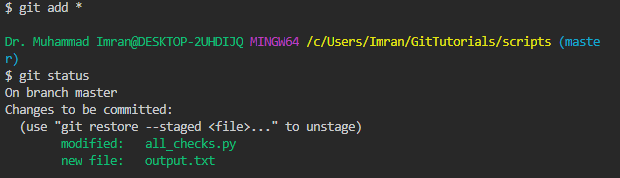

It turns out that both the changes are stagged and ready to be committed, but we don't want to commit the output.txt file. So, we can send it back to modification stage using ```git reset``` command as follows:
```
git reset HEAD output.txt
```
Where HEAD refers to the current checkout snapshot.


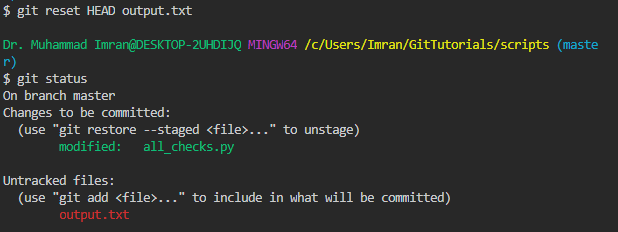

We can see that the output.txt file has been sent to previous state; that is, the file is once again untracked in our working tree and no longer staged.


You can think of reset as the counterpart to add. With add, you can well add changes to the staging area. With reset, you remove changes from the staging area. You can use ```git reset dash p``` to get git to ask you which specific changes you want to reset.

Let's commit the changes (we added a comment line) in the file all_checks.py.
```
git commit -m "Just added a comment line, completely useless."
```


## Amending Commits

In general, we try to make sure our commits include all the right changes and descriptions. But we're all human and we make mistakes. 

Let's say you just finished committing your latest batch of work, but you've forgotten to add a file that belongs to the same change. You'll want to update the commit to include that change. Or maybe the files were correct, but you realize that your commit message just wasn't descriptive enough. So you want to fix the description to add a link to the bug that you're solving with that commit. What can you do? We can solve problems like these using the --amend option of the ```git commit``` command. When we run ```git commit --amend```, git will take whatever is currently in our staging area and run the ```git commit``` workflow to overwrite the previous commit.

Let's see this in an example. We'll go to our scripts directory using ```cd C:/Users/Imran/GitTutorials/scripts``` and create two new files using the touch command as shown below.
```
touch auto-update.py
touch gather-information.sh
```
Then list the contents of the directory using ```ls``` at our Python script and commit it saying that we've added two files.

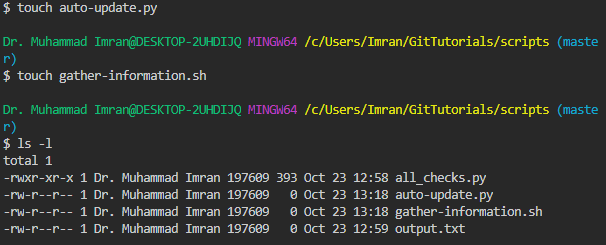

We created two files, but we will add only one file, and will write in the commit message that we have added two files, as shown below:
```
git add auto-update.py
git commit -m "Add two new scripts"
```



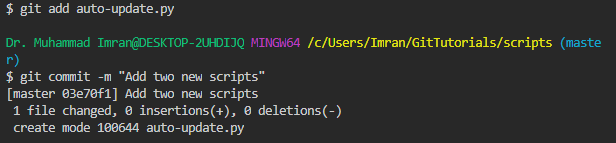

As you can see, the message printed by git says that only one file was added. Our commit message said that we added two files, but we forgot to add one of them. We can fix it. We'll start by adding the missing file and then amending our commit.





We call git commit --amend and an editor opened up showing the commit message and the stats about the commit that we're working with. The list of added files for this commit now includes both files that we wanted to add. 

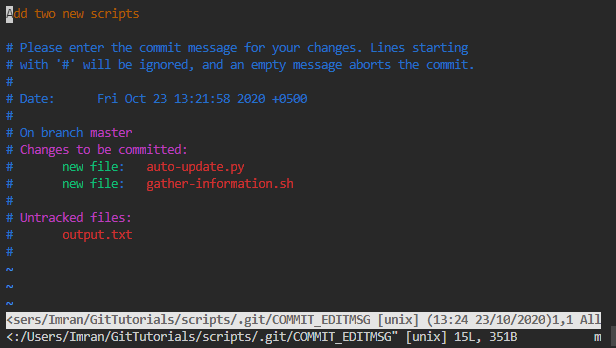


Now that the files have been added, we can also improve our initial commit message which was a bit too short. We'll keep the existing description as the first sentence of our commit, and then add a line of description about the intended purpose of each file.

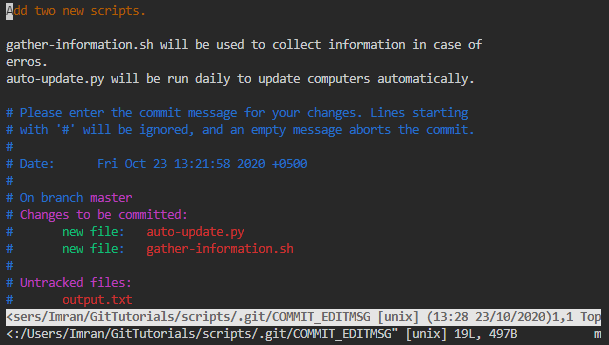

We've amended our previous commit to include both files and a better message. You could also just update the message of the previous commit by running the ```git commit --amend``` command with no changes in the staging area.

---
<font color=red> 
    While git --amend is okay for fixing up local commits, you shouldn't use it on public commits. Meaning, those that have been pushed to a public or shared repository. This is because using --amend rewrites the git history removing the previous commit and replacing it with the amended one. This can lead to some confusing situations when working with other people and should definitely be avoided. So remember, fixing up a local commit with amend is great and you can push it to a shared repository after you fixed it. But you should avoid amending commits that have already been made public. If this sounds confusing now, don't worry. We'll mention it again when we talk about collaborating with others through shared repositories. 
    </font>

---

## Rollbacks
Fixing your work before you commit is good. But what happens if it's already been snapshotted by Git? 


There are a few ways to rollback commits in Git. For now, we'll focus on using the git revert command. Git revert doesn't just mean undo. Instead, it creates a commit that contains the inverse of all the changes made in the bad commit in order to cancel them out. For example, if a particular line was added in the bad commit, then in the reverted commit, the same line will be deleted. This way you get the effect of having undone the changes, but the history of the commits in the project remains consistent leaving a record of exactly what happened. So git revert will create a new commit, that is the opposite of everything in the given commit. We can revert the latest commit by using the head alias that we mentioned before. Since we can think of head as a pointer to the snapshot of your current commit, when we pass head to the revert command we tell Git to rewind that current commit, makes sense? To check this out, we'll first add a faulty commit to our example repo.

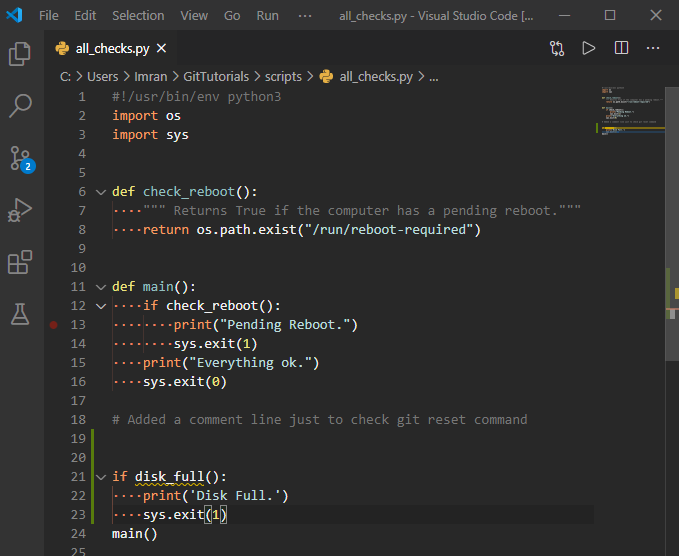


We have introduced following lines into our code
```
if disk_full():
    print('Disk Full.')
    sys.exit(1)
```
Please note that we have called a function ```disk_full()```, but we have not created it; so, it is an error.
Let's commit it
```
git commit -a -m 'Add call to disk_full function'
```

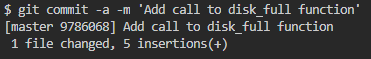

we use the function that we forgot to define. Okay. It's rollback time. Let's get rid of this faulty code by typing git revert head.



So once we issue that git revert command, we're presented with the text editor commit interface that we've all seen before. In this case, we can see that git has automatically added some text to the command indicating it's a rollback.

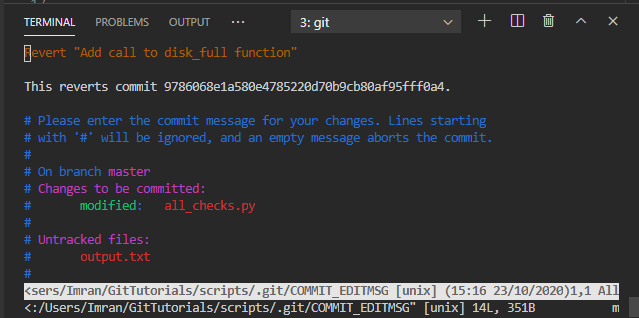
 The first-line mentions that it's reverting the commit we just did called Add call to disk full function. The extra description even includes the identifier of the commit that got reverted. While we could use this description as is, it's usually a good idea to add an explanation of why we're doing the rollback. Remember that the goal of these descriptions is to help our future selves understand why things happen. In this case, we'll explain that the reason for the rollback is that the code was calling a function that wasn't defined.

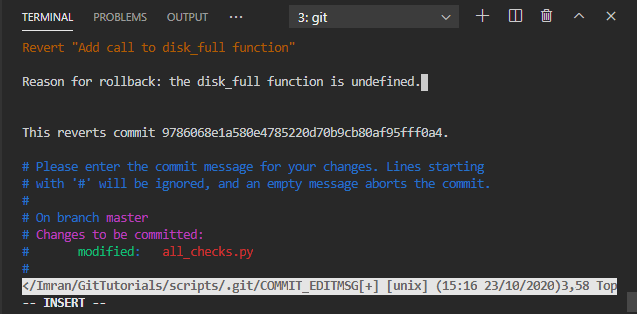

Once we're done entering the description, we can exit and save as usual. You'll notice the output that we get from the git revert command looks like the output of the git commit command. This is because git revert creates a commit for us. Since a revert is a normal commit, we can see both the commit and the reverted commit in the log. 

Let's look at the last two entries in the log using dash P and dash two as parameters. As demonstrated before, the dash P parameter lets us see the patch created by the commit while the dash two perimeter limits the output to the last two entries.

Let's look at the last two entries in the log using dash P and dash two as parameters. As demonstrated before, the dash P parameter lets us see the patch created by the commit while the dash two perimeter limits the output to the last two entries. So in this log, we can see that when we called revert, git created a new commit that's the inverse of the previous one. This removes the lines that we added in the previous commit. We can see that the original commit shows the lines we added by preceding them with a plus sign. The same line shows up with a minus sign in the newer commit message indicating that they were removed. Just like that, the bad commit is reverted and the error stopped. 

## Identifying a Commit
So far we've used the head alias to specify the most recently checked out commit in our Git history. In our bad snapshot example, the error also happened to be in the most recently created commit, but errors can sometimes take a while to be detected. And so, we might need to revert other commits farther back in time. We can target a specific commit by using its commit ID. 

Commit IDs are those complicated looking strings that appear after the word commit in the log messages. Let's have a look at the latest log entry in our checks repo using
```
cd ../checks
git log -1
```

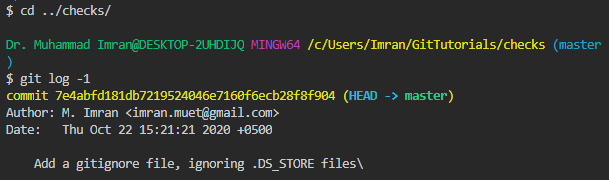

The commit ID is the 40 character long string (7e4abfd181db7219524046e7160f6ecb28f8f904) after the word commit, you really can't miss it. This long jumble of letters and numbers is actually something called a hash, which is calculated using an algorithm called SHA1. 

Remember our discussion about fixing commits with the dash dash amend command? Each time we amend a commit, the commit ID will change. This is why it's important not to use dash dash amend on commits that have been made public.



How can you use commit IDs to specify a particular commit to work with, like during a rollback? Let's look at the last two entries in our repo using the git log -2 command.
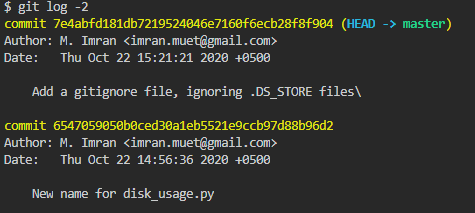
Say we realized that we actually liked the previous name of our script, and so we want to revert this commit where we renamed it. First, let's look at that specific commit using git show, 

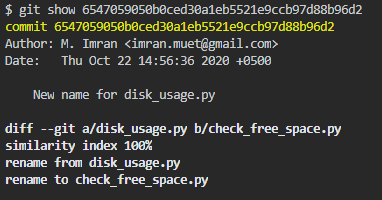
We've copied and pasted the commit ID that we wanted to display, and that works. Alternatively, we could provide just the first few characters identifying the commit to the command, and Git will be smart enough to guess which commit ID starts with those characters, as long as there's only one matching possibility.

Okay, now that we've seen how we can identify the commit that we want to revert, let's call the git revert command with this identifier.


As usual, this will open an editor where we should add a reason for the rollback. In this case, we'll say that the previous name was actually better.

As we called out before, when we generate the rollback, Git automatically includes the ID of the commit that we're reverting. This is useful when looking at a repo with a complicated history that includes a lot of commits. Now, once we save and exit the commit message, Git will actually perform the rollback and generate a new commit with its own ID.

we've managed to revert a commit that wasn't the most recent one. Well done, time travelers. 

# Branching and Merging

## What is Branching?
In Git, a branch at the most basic level is just a pointer to a particular commit. But more importantly, it represents an independent line of development in a project. Of which the commit it points to is the latest link in a chain of developing history. 


**The default branch that Git creates for you when a new repository initialized is called master.**

The master branch is commonly used to represent the known good state of a project. When you want to develop a feature or try something new in your project, you can create a separate branch to do your work without worrying about messing up this current working state. 

---

If this seems confusing, maybe an analogy will help. You can think of a Git project as an assignment your teacher gives you in a class. You do all your work on the assignment in a set of notebooks, each notebook representing a different branch. You use some notebooks to jot down rough drafts in experiments, but you keep one notebook the master branch, in a tidy state and you copy the polish versions of these drafts into it. 

---

 Branches make it really easy to experiment with new ideas or strategies and projects. When you want to add a feature or fix something, you can create a new branch and do your development there. You can merge back into the master branch, when you've got something you like, or discard your changes without negative impact if they don't work out. In Git, branches are used all the time, as a part of the normal development workflow. As an example, think back to the problematic commit we fixed in an earlier video. We added a call to the disk full function, but forgot to actually define the function. So we had to roll it back because our users we're seeing errors. Knowing what we know now, we could have done that work on a separate branch, maybe called something like add disk full. In that case, we could have iterated on our code there until it was working correctly, without it effecting the master branch. Only after the code is ready to be deployed, we would merge those changes back into the master branch.

## Creating New Branches
 - We can use the ```git branch``` command to list, create, delete, and manipulate branches.
 - Running git branch by itself will show you a list of all the branches in your repository.
 
Let's try it out in our checks repo.
 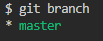
Our list is looking pretty empty with only master branch.

- Creating a branch is a snap. We do it by calling ```git branch``` with the name of the new branch Let's create a new feature branch and then list the branches again with git branch. Our new branch was created based on the value of head.

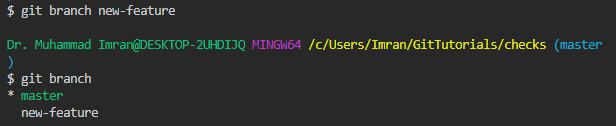

Remember that this might not necessarily be the master branch. The list we get shows that we're still on the master branch. We can tell because the current branch is indicated in the command's output with an asterisk in a different color. We want to switch to a new branch. To do that, we'll need to use the ```git checkout``` command.

We saw earlier how we can use ```git checkout``` to restore a modified file back to the latest commit. Checking out branches is similar in that, the working tree is updated to match the selected branch including both the files and the git history.

Let's switch to our new feature branch by calling git checkout new feature, and then listing our branches once again.


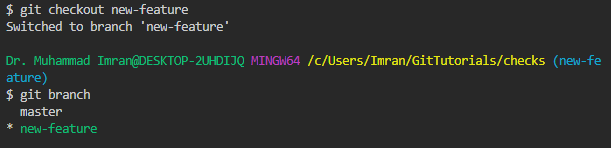

Before we were working on the master branch but now that we've changed to our new branch, the star has moved to new feature.

To create a new branch and to switch to it in a single command. We can use the ```git checkout -b new branch``` to do this. Take a look.

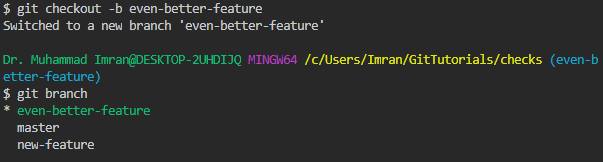

Git created the new branch and switched to it in just one command. 

Now that we have our shiny new branch, let's create a new file in. We'll create a new Python3 file, that will include the usual shebang line and empty main function and a call to that function.
```
touch free_memory.py
start free_memory.py
```
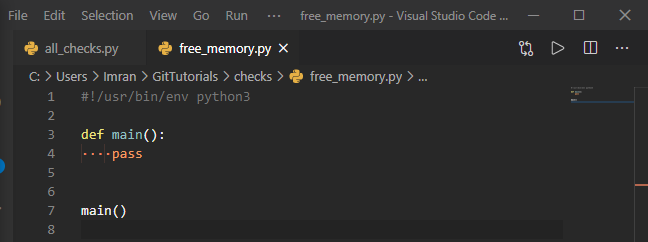



 As it's in a separate branch, it's okay for it to not be finished yet. Let's save our file and commit it to the current branch now.
 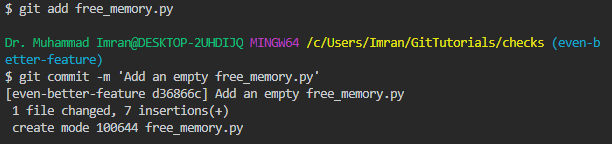
 
 We've added a commit in this branch and it's looking better. Let's check the last two entries in the log.

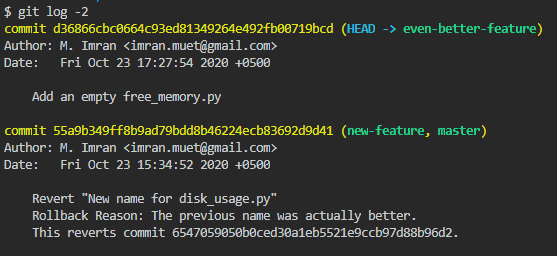
We see the last two commits in this branch. Notice how next to the latest commit ID, git shows that this is where head is pointing to and that the branch is called even better feature. Next to the previous commit, git shows that both the master and the new feature branches are pointing to that snapshot of the project. In this way, we can see that the even better feature branch is ahead of the master branch. With that, we've seen how we can create new branches and commit changes to them. 

 ## Working with Branches
 Let's check out the current status of our repo by calling ```git status``` and ```ls -l```
 
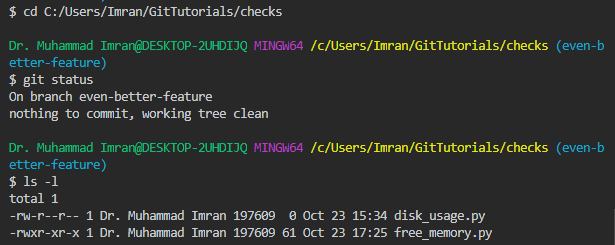

We can see that we're on a clean working tree in the __even-better-feature__ branch, and that a new **free_memory.py** file is in our working tree. 

Let's now change back to the **master** branch using ```git checkout master``` and then lists the latest two commits there.


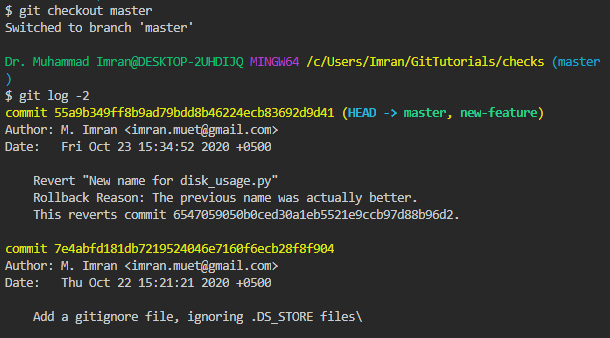


When we switch to a different branch using ```git checkout```, under the hood, git changes where head is pointing. 

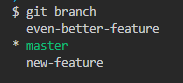

Thanks to this checkout, head went from pointing to the latest commit in the **even-better-feature** branch to the most recent commit of the **master** branch. The commit from **even-better-feature**  doesn't show up at all, and the latest snapshot is the second entry we've seen before. Remember that when we switch branches, git will also change files in our working directory or working tree to whatever snapshot head is currently pointing at. Let's look at the current contents of our directory.

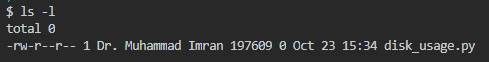

**Free_memory.py** isn't there. <font color=red>This demonstrates that when we switch branches in git, the working directory and commit history will be changed to reflect the snapshot of our project in that branch.</font> When we check out a new branch and commit on it, those changes will be added to the history of that branch. Since **free_memory.py** was committed on another branch, it doesn't show up in the history or working directory of the **master** branch. One thing to note after all this back and forth, is that each branch is just a pointer to a specific commit in a series of snapshots. It's very easy to create new branches because there isn't any data that needs to be copied around. When we switch to another branch, we check out a different commit and git updates both head and the contents of our working directory. 

### Deleting a branch
We can delete a branch using ```git branch -d```. Let's first list the current branches in our repo and then get rid of the new feature branch by calling ```git branch dash d new-feature```. Just like that, our branch was trimmed. We can check with another call to ```git branch``` that is not there anymore.

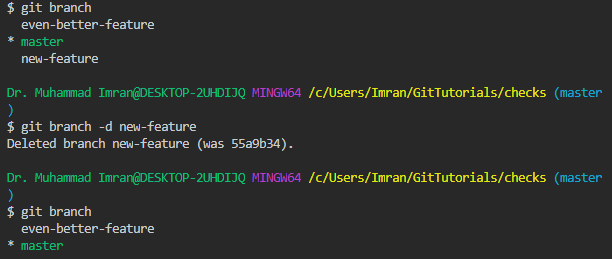

If there are changes in the branch we want to delete that haven't been merged back into the **master** branch, git will let us know with an error.

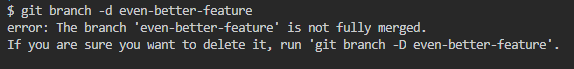

Hopefully, git also gives us the command (```git branch -D even-better_branch```) to run if we were sure that we wanted to delete the branch, even if it has unmerged changes. But we won't do that just yet. 

## Merging
A typical workflow for managing branches in Git, is to create a separate branch for developing any new features or changes. Once the new feature's in good shape, we merge the separate branch back into the main trunk of code. We'll use the ```git merge``` command, which lets us take the independent snapshots and history of one Git branch, and tangle them into another.

Let's try this out:

    - First, will check that we're in master branch, and then 
    - we'll call git merge even-better-feature to merge the even-better-feature branch into the master branch. 
    
Now we've brought the master branch up to speed, which we can see by looking at the git log.

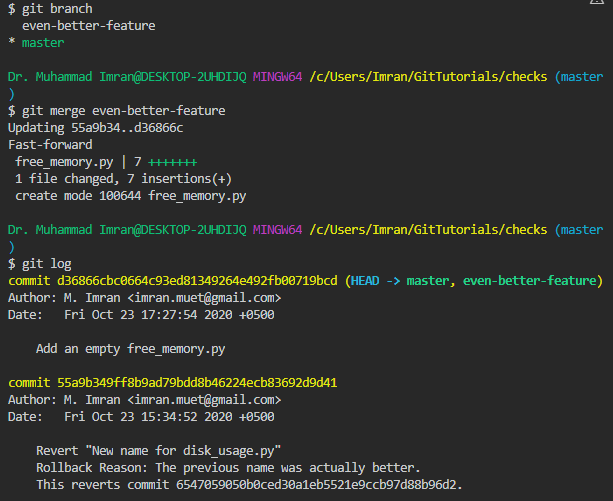

As we're on the master branch, HEAD points at master. We can see the even-better-feature and master branches are now both pointing at the same commit.

Git uses two different algorithms to perform a merge:
1. fast-forward and 
2. three-way merge. 

The merge we just performed is an example of a fast-forward merge. This kind of merge occurs when all the commits in the checked out branch are also in the branch that's being merged. 


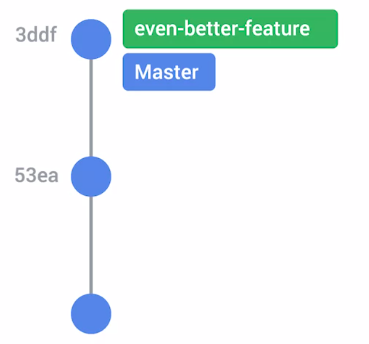

If this is the case, we can say that the commit history of both branches doesn't diverge. In these cases, all Git has to do is update the pointers of the branches to the same commit, and no actual merging needs to take place. 

On the other hand, a three-way merge is performed when the history of the merging branches has diverged in some way, and there isn't a nice linear path to combine them via fast-forwarding. 


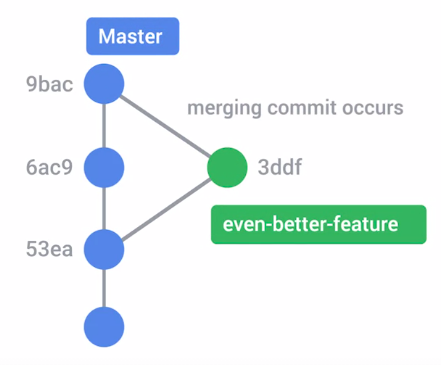

This happens when a commit is made on one branch after the point when both branches split.

In our case, this could have happened if we made a commit on the master branch after creating the other branches.

When this occurs, Git will tie the branch histories together with a new commit. And merge the snapshots at the two branch tips with the most recent common ancestor, the commit before the divergence. To do this successfully, Git tries to figure out how to combine both snapshots. If the changes were made in different files, or in different parts of the same file, Git will take both changes and put them together in the result. If instead the changes are made on the same part of the same file, Git won't know how to merge those changes, and the attempt will result in a merge conflict.

## Merge Conflict
From time to time, we might find that both the branches we're trying to merge have edits to the same part of the same file. This will result in something called a merge conflict. Normally, Git can automatically merge files for us. But when we have a merge conflict, it will need a little help to figure out what to do. 

To see how this would look, 

- Step 1: let's edit the **free_memory.py** file in the **master** branch  and replace the pass statement with a comment about what the main function should do.
```
git branch master
start free_memory.py
```

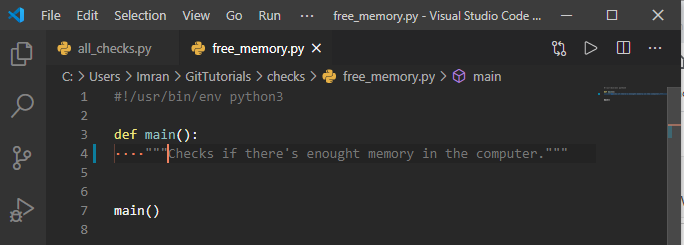

- Step 2: We made the change so let's save it and commit it back to our master branch.
    ```
    git commit -a -m 'Add comment to main()'
    ```
    

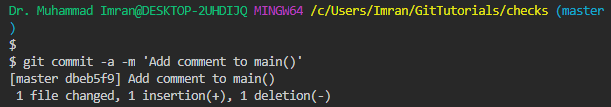

- Step 3: Next, Let's check out the even-better-feature branch and make a change in the same place. In this case, we will replace the call to pass with a call to print, saying that everything is okay.
```
git checkout even-better-feature
start free_memory.py
```

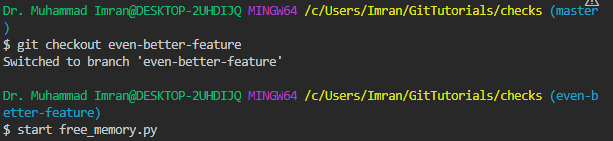



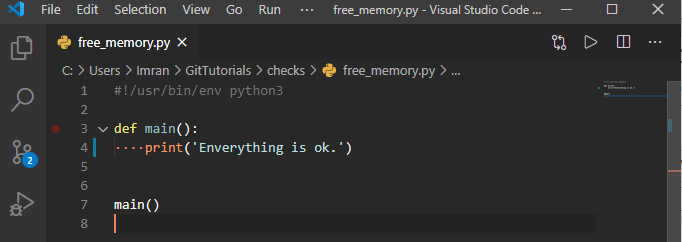
- step 4: Now, we'll save this other change and commit it to this branch.
```
git commit -a -m 'Print everything is ok.`
```

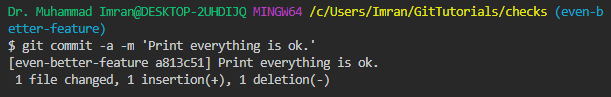

- Step 5: Let's check out the master branch again and try to merge the even-better-feature back into it.
```
 git checkout master
 git merge even-better-feature

```
 
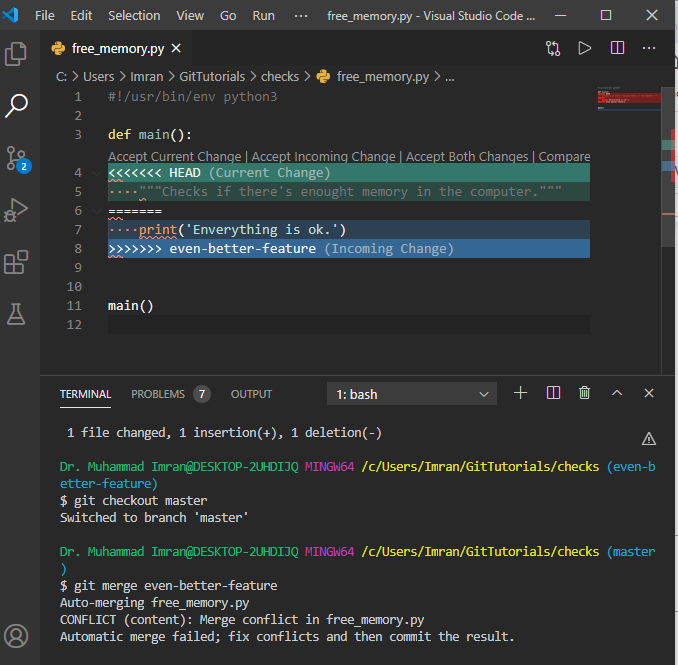

---

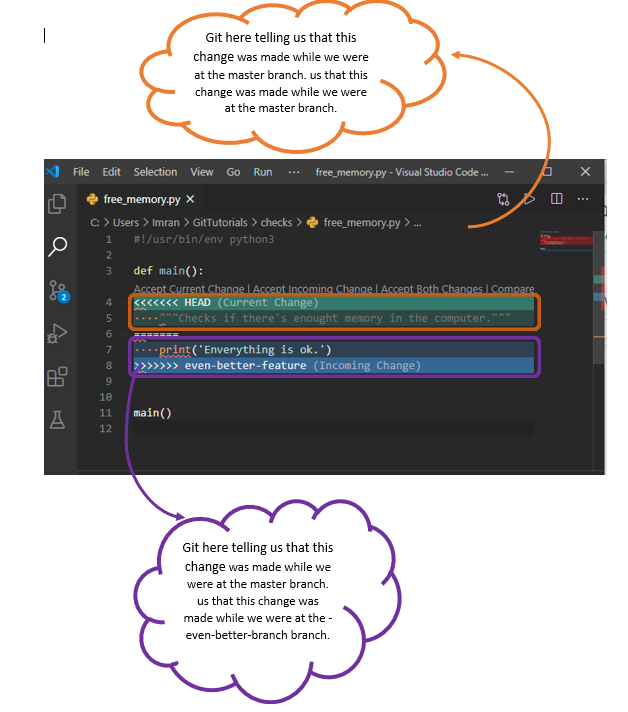

Git giving us the information about what changes were made at what branches. We can keep both changes by clicking on "Accept Both Changes"

---

- Step 6: Git tells us it tried to automatically merge the two versions of the free memory file, but it didn't know how to do it. We can use Git's status to get more information about what's going on.

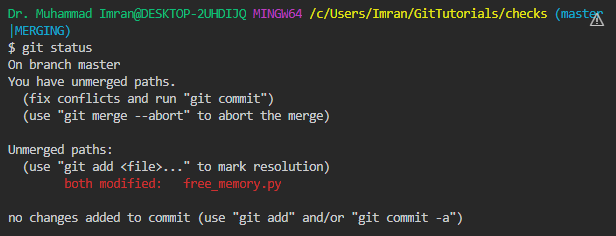


As usual, ```git status``` gives us a lot of additional information. It tells us that we have files that are currently unmerged, and that we need to fix the conflicts or abort the merge if we decide it was a mistake. It also tells us that we need to run ```Git add``` on each unmerged file to mark that the conflicts have been resolved. 

- Step 7: To fix the conflict, let's open up free_memory.py in our text editor.

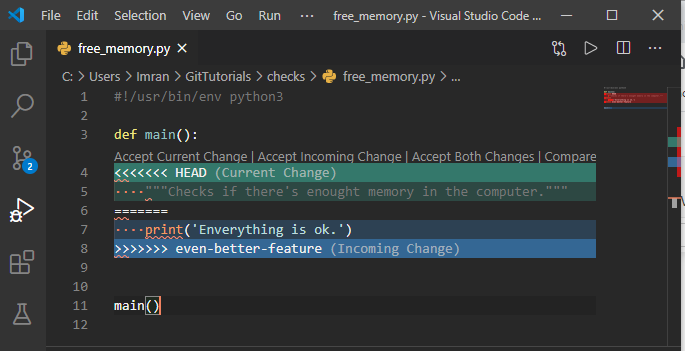

Thankfully, Git has added some information to our files to tell us which parts of the code are conflicting. The unmerged content of the file at head, remember, in this case, head points to master, is the docstring stating what the main function should do. The unmerged content of the file in the even-better-feature branch is the call to the print function. It's up to us to decide which one to keep or if we should change the contents of the file altogether. In this case, 
- Step 8: we'll keep both statements by clicking on "Accept Both Changes"

- Step 9: Now that we've fixed the conflict, we'll mark it as resolved by running ```git add``` on the file, and then call the ```git status``` to see how our merge is doing.

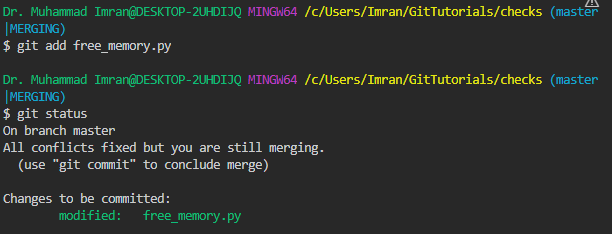

See how Git now tells us that all conflicts have been resolved.

- Step 10: we just need to call ```git commit``` to wrap up the merge.

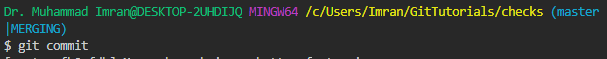



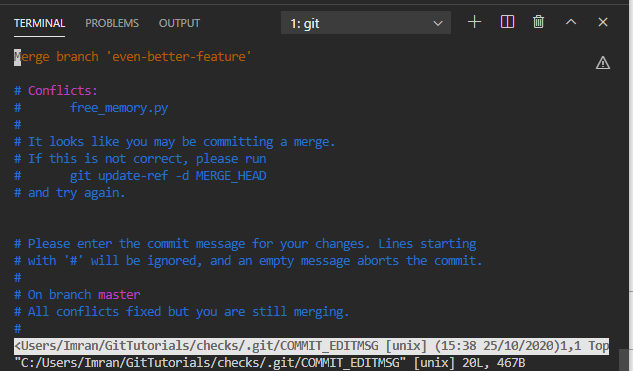

The comments that git commit shows us look different than other commits. That's because this is a merge and Git tells us so. It also tells us which file had conflicts which have now been resolved. The commit already has a description saying that it's merging the other branch. This description was automatically created when we called the git merge command. But we can add onto this description if we want. For example, we can say that we're keeping the lines from both branches, and then just save and exit as usual.

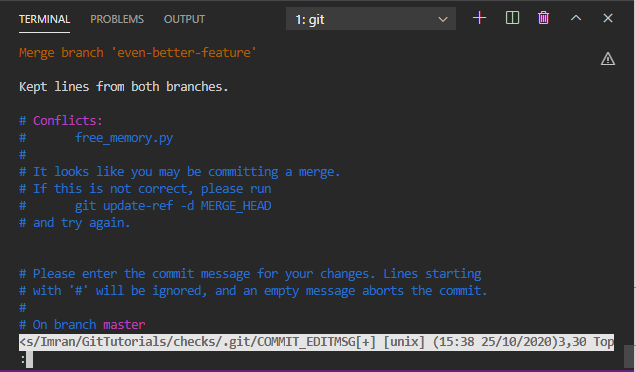

The merge conflict is resolved. To see what the commit history looks like now, we'll use a couple of handy options to the ```git log``` command; ```--graph``` for seeing the commits as a graph, and ```--oneline``` to only see one line per commit. 


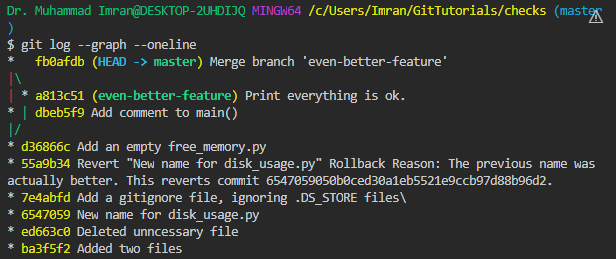

This format helps us better understand the history of our commits and how merges have occurred. We can see the new commit that was added and also the two separate commits that we merged. One coming from the master branch and the other coming from the even-better-feature branch. We can also see that master is pointing to the merge commit but even-better-feature is still pointing to the previous one. In our example, resolving the conflict was straightforward and easy. But in the real world, this won't always be the case. Merge conflicts can sometimes be tricky, complicated, and spread across multiple files. If you want to throw the merge away and start over, you can use the git merge --abort command as an escape hatch. This will stop the merge and reset the files in your working tree back to the previous commit before the merge ever happened. So by now you know how to create, delete, and switch between branches in Git. You've also seen that each branch represents a pointer to a commit in a sequence of independent snapshots. You know how to merge these commits back into the main trunk by using the git merge command. 